## **Session 08 / 16-Nov-2025**

### ***Importing all required liberaries for today's exercise***

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from collections import Counter
from sklearn.preprocessing import StandardScaler

### ***Today's task: Exploratory Data Analysis (EDA)***
### ***In this exercise, we will perform Exploratory Data Analysis (EDA) to better understand the dataset before applying machine learning models.***

### ***Step 1: Loading the dataset and taking an initial look***

In [83]:
df = pd.read_csv("diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

### ***Step 2: Descriptive statistics***

In [84]:
df.describe()
print("*************************************")
print(df.info())
print("*************************************")
print(df.shape)
print("*************************************")
print(f"Columns Name: {df.columns.tolist()}")
print("*************************************")

*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
*************************************
(768, 9)
*************************************
Columns Name: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFu

### ***Step 3: Missing values***
### ***If any value is greater than zero, it indicates missing data in that column.***

In [85]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### ***Step 4: Detecing invalid zeros***
### ***Some features cannot realistically be zero, so zeros in these columns represent missing values.***

In [86]:
zero_accept = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in zero_accept:
    zero_counts = df[df[col] == 0].sum()
    print(f"{col}: {zero_counts} zero found")

Glucose: Pregnancies                  14.000
Glucose                       0.000
BloodPressure               338.000
SkinThickness               148.000
Insulin                      23.000
BMI                         164.400
DiabetesPedigreeFunction      1.901
Age                         143.000
Outcome                       2.000
dtype: float64 zero found
BloodPressure: Pregnancies                  127.000
Glucose                     4123.000
BloodPressure                  0.000
SkinThickness                 53.000
Insulin                        0.000
BMI                          899.700
DiabetesPedigreeFunction      13.595
Age                         1075.000
Outcome                       16.000
dtype: float64 zero found
SkinThickness: Pregnancies                  1053.000
Glucose                     28023.000
BloodPressure               14555.000
SkinThickness                   0.000
Insulin                         0.000
BMI                          6839.500
DiabetesPedigreeFunction

### ***Step 5: Checking data distribution (Histogram)***
### ***Histogram helps identify how narmally distributed each feature is. The more concentrated the values are around the center, the more stable and reliable the feature may be.***

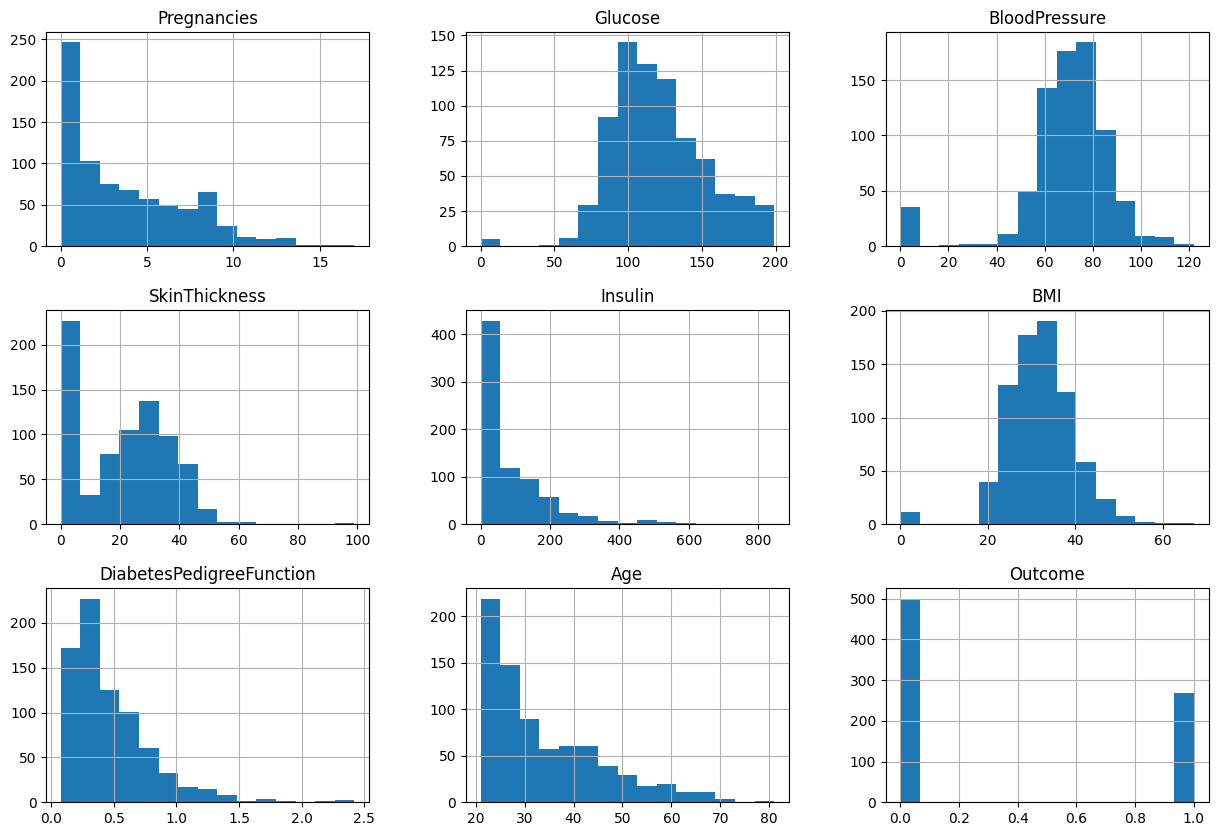

In [87]:
df.hist(bins=15, figsize=(15,10))
plt.show()

### ***Step 6: Correlation analysis (Heatmap)***
### ***Red colors indicate strong positive correlation./ Blue colors indicate strong negative correlation./ The closer a value is to ±1, the stronger the relationship.***

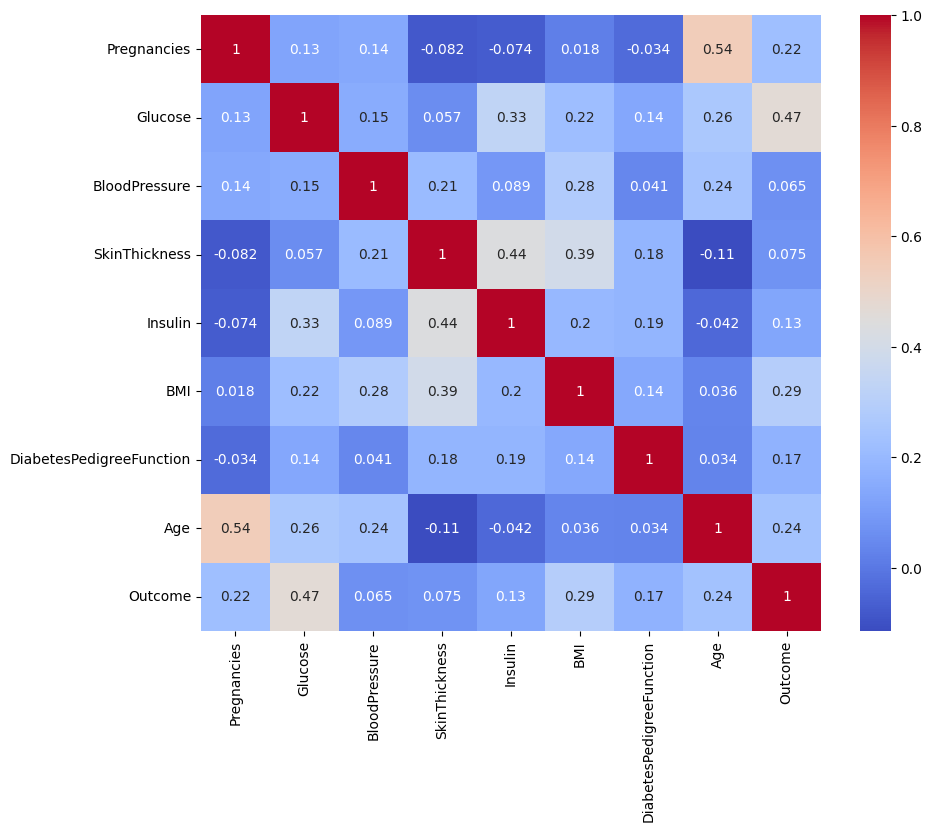

In [88]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

### ***Step 7: Class balance (Outcome distribution)***

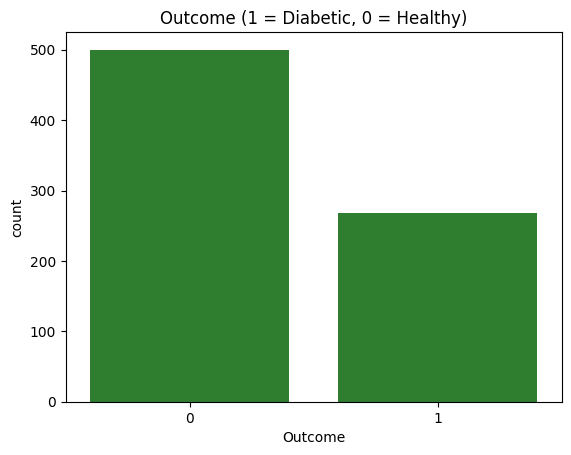

In [89]:
sns.countplot(x="Outcome", data=df, color="forestgreen")
plt.title("Outcome (1 = Diabetic, 0 = Healthy)")
plt.show()

### ***Step 8: Data cleaning***
### ***Replace invalid zeros with the mean of non-zero values in each column.***

In [90]:
# Cleaning invalid zero values
cols_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_replace:
    mean_val = df.loc[df[col] != 0, col].mean()
    df.loc[df[col] == 0, col] = mean_val
    print(df[cols_replace].eq(0).sum())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2064\1112960494.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.6867627785059' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2064\1112960494.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.40518417462484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2064\1112960494.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.153419593345657' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col

Glucose            0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Glucose            0
BloodPressure      0
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin          374
BMI               11
dtype: int64
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI              11
dtype: int64
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2064\1112960494.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '155.5482233502538' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == 0, col] = mean_val


### ***Preparing features and target:***

In [91]:
target_col = df.columns[-1]
x = df.iloc[:, :-1]
y = df[target_col]

### ***Ensure numeric values and drop NaNs***

In [92]:
x = x.apply(pd.to_numeric, errors="coerce")
y = y.apply(pd.to_numeric, errors="coerce")

df_clean = pd.concat([x, y], axis=1).dropna()
x_clean = df_clean.iloc[:, :-1]
y_clean = df_clean[target_col]

### ***Step 9: Train/Test split***

In [93]:
x_train, x_test, y_train, y_test = train_test_split(
    x_clean,
    y_clean,
    random_state=42,
    test_size=0.2,
    stratify=y_clean
)

### ***Step 10: Standardization and Model Training***

In [94]:
scaler = StandardScaler()
np.random.seed(42)
data_size =500

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### ***Decision Tree***

In [95]:
dt_classifier = DecisionTreeClassifier(
    max_depth=8,
    random_state=42, 
    min_samples_split=4, 
    min_samples_leaf=2
)
dt_classifier.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,4
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### ***Random Forest***

In [96]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### ***Predictions***

In [97]:
y_pred_test_dt = dt_classifier.predict(x_test)
y_pred_test_rf = rf_classifier.predict(x_test)

### ***Step 11: Evaluation metrics***

In [98]:
# Accuracy 
acc_test_dt = accuracy_score(y_test, y_pred_test_dt)
acc_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Recall
recall_test_dt = recall_score(y_test, y_pred_test_dt)
recall_test_rf = recall_score(y_test, y_pred_test_rf)

# Precision
pre_test_dt = precision_score(y_test, y_pred_test_dt)
pre_test_rf = precision_score(y_test, y_pred_test_rf)

print(f"Accuracy_DT: {acc_test_dt:.2f} \tAccuracy_RF: {acc_test_rf:.2f}")
print(f"Recall_DT: {recall_test_dt:.2f} \tRecall_RF: {recall_test_rf:.2f}")
print(f"Precision_DT: {pre_test_dt:.2f} \tPrecision_RF: {pre_test_rf:.2f}")

Accuracy_DT: 0.73 	Accuracy_RF: 0.78
Recall_DT: 0.44 	Recall_RF: 0.63
Precision_DT: 0.67 	Precision_RF: 0.71


### ***Homework:***
### ***Calculating Gini Gain and Information Gain for practice in this session.***

In [99]:
def calculate_entropy(labels):
    if len(labels) == 0: return 0
    value, counts = np.unique(labels, return_counts=True)
    p = counts / len(labels)
    entropy = -(np.sum(p*np.log2(p)))
    return entropy

def calculate_gini(labels):
    if len(labels) == 0: return 0
    value, counts = np.unique(labels, return_counts=True)
    p = counts / len(labels)
    gini = 1-np.sum(p**2)
    return gini

def calculate_ig(ini_labels, subset_labels):
    ini_entropy = calculate_entropy(ini_labels)
    w_entropy = 0
    total_size = len(ini_labels)
    for subset in subset_labels:
        sub_size = len(subset)
        sub_entropy = calculate_entropy(subset)
        w_entropy += (sub_size / total_size) * sub_entropy
    return ini_entropy - w_entropy

def calculate_gg(ini_labels, subset_labels):
    ini_gini = calculate_gini(ini_labels)
    w_gini = 0
    total_size = len(ini_labels)
    for subset in subset_labels:
        sub_size = len(subset)
        sub_gini = calculate_gini(subset)
        w_gini += (sub_size / total_size) * sub_gini
    return ini_gini - w_gini

In [101]:
ini_labels = df["Outcome"].to_numpy()

In [103]:
labels_G_min_100 = df[df["Glucose"] <= 100]["Outcome"].to_numpy()
labels_G_max_100 = df[df["Glucose"] > 100]["Outcome"].to_numpy()

ig_Glucose = calculate_ig(ini_labels, [labels_G_min_100, labels_G_max_100])
gg_Glucose = calculate_gg(ini_labels, [labels_G_min_100, labels_G_max_100])
print(f"IG_Glucose: {ig_Glucose:.2f} \nGG_Glucose: {gg_Glucose:.2f}")

IG_Glucose: 0.10 
GG_Glucose: 0.05


In [104]:
labels_age_min_30 = df[df["Age"] <= 30]["Outcome"].to_numpy()
labels_age_max_30 = df[df["Age"] > 30]["Outcome"].to_numpy()

ig_age = calculate_ig(ini_labels, [labels_age_min_30, labels_age_max_30])
gg_age = calculate_gg(ini_labels, [labels_age_min_30, labels_age_max_30])
print(f"IG_Age: {ig_age:.2f} \nGG_Age: {gg_age:.2f}")

IG_Age: 0.07 
GG_Age: 0.04
